In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats

# SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [6]:
df_train = pd.read_csv('df_transformed.csv', header = 0)
df_train

,Unnamed: 0,Unnamed: 0.1,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,SaleType,SaleCondition,SalePrice,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log,2ndFlrSF_log,LotArea_log,GrLivArea_log
0,0,0,1,60,RL,65.0,8450,2,4,Lvl,...,WD,Normal,208500,0,0,0,6.752270,6.749931,9.041922,7.444249
1,1,1,2,20,RL,80.0,9600,2,4,Lvl,...,WD,Normal,181500,0,0,0,7.140453,-inf,9.169518,7.140453
2,2,2,3,60,RL,68.0,11250,2,3,Lvl,...,WD,Normal,223500,0,0,0,6.824374,6.763885,9.328123,7.487734
3,3,3,4,70,RL,60.0,9550,2,3,Lvl,...,WD,Abnorml,140000,0,0,0,6.867974,6.628041,9.164296,7.448334
4,4,4,5,60,RL,84.0,14260,2,3,Lvl,...,WD,Normal,250000,0,0,0,7.043160,6.959399,9.565214,7.695303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,RL,62.0,7917,2,4,Lvl,...,WD,Normal,175000,0,0,0,6.859615,6.542472,8.976768,7.406711
1456,1456,1456,1457,20,RL,85.0,13175,2,4,Lvl,...,WD,Normal,210000,0,0,0,7.636752,-inf,9.486076,7.636752
1457,1457,1457,1458,70,RL,66.0,9042,2,4,Lvl,...,WD,Normal,266500,0,0,0,7.080026,7.049255,9.109636,7.757906
1458,1458,1458,1459,20,RL,68.0,9717,2,4,Lvl,...,WD,Normal,142125,0,0,0,6.982863,-inf,9.181632,6.982863


<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

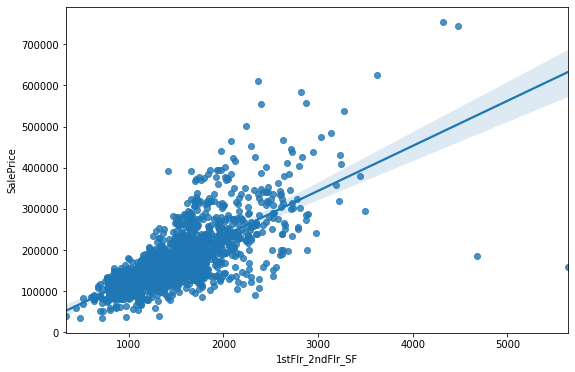

In [7]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

<AxesSubplot:xlabel='OverallGrade', ylabel='SalePrice'>

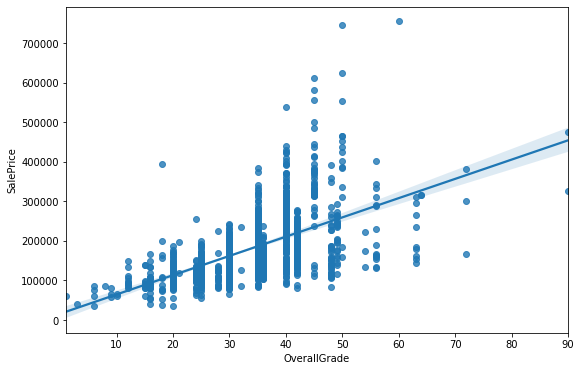

In [8]:
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train["OverallGrade"]), y=df_train['SalePrice'], data=df_train, order=1)

# simplifying existing featuers

(-0.5, 5.5, 0.0, 800000.0)

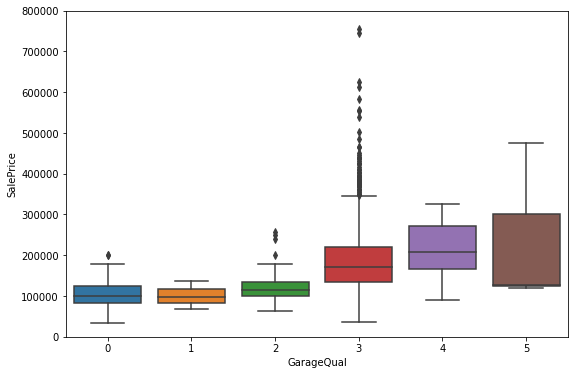

In [9]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [10]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

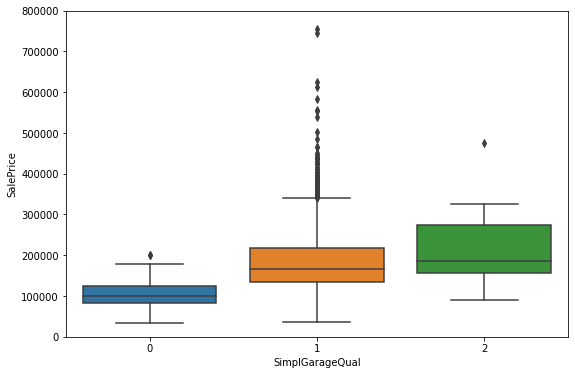

In [11]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [12]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]

In [13]:
df_numeric

,Unnamed: 0,Unnamed: 0.1,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,...,GarageYrBlt_missing_ind,LotFrontage_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log,2ndFlrSF_log,LotArea_log,GrLivArea_log,1stFlr_2ndFlr_SF,OverallGrade,SimplGarageQual
0,0,0,1,60,65.0,8450,2,4,4,3,...,0,0,0,6.752270,6.749931,9.041922,7.444249,1710,35,1
1,1,1,2,20,80.0,9600,2,4,4,3,...,0,0,0,7.140453,-inf,9.169518,7.140453,1262,48,1
2,2,2,3,60,68.0,11250,2,3,4,3,...,0,0,0,6.824374,6.763885,9.328123,7.487734,1786,35,1
3,3,3,4,70,60.0,9550,2,3,4,3,...,0,0,0,6.867974,6.628041,9.164296,7.448334,1717,35,1
4,4,4,5,60,84.0,14260,2,3,4,3,...,0,0,0,7.043160,6.959399,9.565214,7.695303,2198,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,62.0,7917,2,4,4,3,...,0,0,0,6.859615,6.542472,8.976768,7.406711,1647,30,1
1456,1456,1456,1457,20,85.0,13175,2,4,4,3,...,0,0,0,7.636752,-inf,9.486076,7.636752,2073,36,1
1457,1457,1457,1458,70,66.0,9042,2,4,4,3,...,0,0,0,7.080026,7.049255,9.109636,7.757906,2340,63,1
1458,1458,1458,1459,20,68.0,9717,2,4,4,3,...,0,0,0,6.982863,-inf,9.181632,6.982863,1078,30,1
